# Working with structured data in Python using Pandas

### What is data preprocessing? 

Process of converting raw data into useful format.In order to better understand the data, we need to gather some statistical insights into our data. In this module of the course, we will use some of the libraries available with Python and Jupyter to examine our data set. 

### What is pandas? 

[pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

### Data

We'll use a data set from [Kaggle](https://www.kaggle.com/) for this workshop. You'll need to download it to your local machine, then upload to your project running in Cloud Pak for Data as a Service.

The *insurance.csv* dataset acquired from *Kaggle*  contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value designated for each level.

We'll continue to use the [`insurance.csv`](https://www.kaggle.com/noordeen/insurance-premium-prediction/download) file from you project assets, so if you have not already [`downloaded this file`](https://www.kaggle.com/noordeen/insurance-premium-prediction/download) to your local machine, and uploaded it to your project, do that now.

## Table of Contents

1. [Using the Jupyter notebook](#jupyter)<br>
1. [Series and DataFrames](#series)<br>
1. [Loading Data](#loading)<br>
1. [Exploring Data](#exploring)<br>
1. [Cleaning Data](#cleaning)<br>
1. [Analyzing Data](#selection)<br>

<a id="jupyter"></a>
## 1. Using the Jupyter notebook

### Jupyter cells

When you are editing a cell in Jupyter notebook, you need to re-run the cell by pressing **`<Shift> + <Enter>`**. This will allow changes you made to be available to other cells.

Use **`<Enter>`** to make new lines inside a cell you are editing.

#### Code cells

Re-running will execute any statements you have written. To edit an existing code cell, click on it.

#### Markdown cells

Re-running will render the markdown text. To edit an existing markdown cell, double-click on it.

<hr>

### Common Jupyter operations

Near the top of the Jupyter notebook page, Jupyter provides a row of menu options (`File`, `Edit`, `View`, `Insert`, ...) and a row of tool bar icons (disk, plus sign, scissors, 2 files, clipboard and file, up arrow, ...).

#### Inserting and removing cells

- Use the "plus sign" icon to insert a cell below the currently selected cell
- Use "Insert" -> "Insert Cell Above" from the menu to insert above

#### Clear the output of all cells

- Use "Kernel" -> "Restart" from the menu to restart the kernel
    - click on "clear all outputs & restart" to have all the output cleared

#### Save your notebook file locally

- Clear the output of all cells
- Use "File" -> "Download as" -> "IPython Notebook (.ipynb)" to download a notebook file representing your session

<hr>

<a id="series"></a>
## 2. Series and DataFrames 

Before we dive into our dataset we will first look at examples to understand the difference between two key data structures that pandas offers us - *Series* and *DataFrames*

A `Series` is a one-dimensional labelled array that can contain of any type (integer, string, float, python objects, etc.).

In [1]:
import pandas as pd
import numpy as np

In [2]:
s = pd.Series
([1, 3, 5, np.nan, 6, 8])
ss = pd.Series


A `DataFrame` is a two-dimensional data structure, the data consists of rows and columns that you can create a in many ways, by loading a file or using a NumPy array and a date for the index.

<div class="alert alert-info" style="font-size:100%">
<a href="https://numpy.org"> NumPy</a> is a Python library for working with multi-dimensional arrays and matrices with a large collection of mathematical functions to operate on these arrays.
Have a look at this <a href="https://docs.scipy.org/doc/numpy-1.15.0/user/quickstart.html"> NumPy tutorial</a> for an overview.
</div>



Create DataFrame `df1` with `dates` as the index, a 6 by 4 array of random `numbers` as values, and column names A, B, C and D (the index will be explained in the next section):  

In [3]:
dates = pd.date_range('20200101', periods=6)
dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
numbers = np.random.randn(6, 4)
numbers

array([[-0.04791425,  1.62505771,  0.72303012,  0.49711401],
       [-0.42887544,  2.59599492,  0.4844262 ,  2.44916126],
       [ 0.08073103, -1.23977225, -0.24139073, -1.02402081],
       [ 1.40607273, -2.69403293,  0.51590007,  0.12826714],
       [ 0.37201553, -1.23437343,  0.85392364,  1.23792669],
       [-0.21823641, -0.32045526,  0.79158054, -0.37144341]])

In [5]:
df1 = pd.DataFrame(numbers, index=dates, columns=['A', 'B', 'C', 'D'])
df1

,A,B,C,D
2020-01-01,-0.047914,1.625058,0.723030,0.497114
2020-01-02,-0.428875,2.595995,0.484426,2.449161
2020-01-03,0.080731,-1.239772,-0.241391,-1.024021
2020-01-04,1.406073,-2.694033,0.515900,0.128267
2020-01-05,0.372016,-1.234373,0.853924,1.237927
2020-01-06,-0.218236,-0.320455,0.791581,-0.371443


Or create a DataFrame by combining the above in one command:

In [6]:
df2 = pd.DataFrame({'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                     'D': np.array([3] * 4, dtype='int32'),
                     'E': pd.Categorical(["test", "train", "test", "train"]),
                     'F': 'foo'})

In [7]:
df2.head()

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Use `type()` to check the data type of each variable. Below `print` is used to display the data type of all of them used so far:

In [8]:
print('Data type of s is '+str(type(s)))
print('Data type of s is '+str(type(dates)))
print('Data type of s is '+str(type(numbers)))
print('Data type of df is '+str(type(df1)))

Data type of s is <class 'type'>
Data type of s is <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Data type of s is <class 'numpy.ndarray'>
Data type of df is <class 'pandas.core.frame.DataFrame'>


<a id="data"></a>
## 3 Loading data 

A lot of data is **structured data**, which is data that is organized and formatted so it is easily readable, for example a table with variables as columns and records as rows, or key-value pairs in a noSQL database. As long as the data is formatted consistently and has multiple records with numbers, text and dates, you can probably read the data with [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), an open-source Python package providing high-performance data manipulation and analysis.

### 3.1 Load our data as a pandas data frame

**<font color='red'><< FOLLOW THE INSTRUCTIONS BELOW TO LOAD THE DATASET >></font>**

* Highlight the cell below by clicking it.
* Click the `10/01` "Find data" icon in the upper right of the notebook.
* Add the locally uploaded file `insurance.csv` by choosing the `Files` tab. Then choose the `insurance.csv`. Click `Insert to code` and choose `Insert Pandas DataFrame`.
* The code to bring the data into the notebook environment and create a Pandas DataFrame will be added to the cell below.
* Run the cell

In [9]:
# Place cursor below and insert the Pandas DataFrame for the Insurance Expense data


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### 3.2 Update the variable for our Pandas dataframe

We'll use the Pandas naming convention df for our DataFrame. Make sure that the cell below uses the name for the dataframe used above. For the locally uploaded file it should look like df_data_1 or df_data_2 or df_data_x. 

**<font color='red'><< UPDATE THE VARIABLE ASSIGNMENT TO THE VARIABLE GENERATED ABOVE. >></font>**

In [10]:
# Replace data_df_1 with the variable name generated above.
df = df_data_1

**OPTIONAL : Read data from a CSV file using the `read_csv` function. Load a file by running the next cell:**

The file can also be read directly from a URL, but you can replace this with a local path when running this notebook on a local system.

## 4. Exploring Data

Now let's have a look at the data that was loaded into the notebook. What are we actually looking at?

####   `df.shape` gives the number of rows and columns

In [11]:
df.shape

(1338, 7)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
expenses    1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


####  `len(df)` gives the number of rows

In [13]:
len(df)

1338

####  Use `df.dtypes` to check the different variables and their datatype

In [14]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

####  `df.columns` gives a list of all column names

In [15]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [16]:
list(df)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']

In [17]:
all_columns         = list(df)

####  *select_dtypes* can be used to list columns of a particular datatype. In the cell below, we list numerical columns. 

In [18]:
numerical_columns     = list(df.select_dtypes(include=['float64','int64']).columns)

print('Numerical columns : ')
print(numerical_columns)


Numerical columns : 
['age', 'bmi', 'children', 'expenses']


and in the cell below, we identify categorical columns from the dataset. 

In [19]:
categorical_columns = [x for x in all_columns if x not in numerical_columns ]

print('Categorical columns : ')
print(categorical_columns)

Categorical columns : 
['sex', 'smoker', 'region']


####  *nunique()* is used to identify number of unique values within each column in the dataset

In [20]:
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [21]:
df.values

array([[19, 'female', 27.9, ..., 'yes', 'southwest', 16884.92],
       [18, 'male', 33.8, ..., 'no', 'southeast', 1725.55],
       [28, 'male', 33.0, ..., 'no', 'southeast', 4449.46],
       ...,
       [18, 'female', 36.9, ..., 'no', 'southeast', 1629.83],
       [21, 'female', 25.8, ..., 'no', 'southwest', 2007.95],
       [61, 'female', 29.1, ..., 'yes', 'northwest', 29141.36]],
      dtype=object)

 ####  With `df.head()` or `df.tail()` you can view the first five or last five lines from the data. Add a number between the brackets `()` to specify the number of lines you want to display., e.g. `df.head(2)`

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [23]:
df.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55


In [24]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


<a id="cleaning"></a>
## 5. Cleaning Data

When exploring data there are always transformations needed to get it in the format you need for your analysis, visualisations or models. Below are only a few examples of the endless possibilities. 

First, let's make a copy of the Dataframe :

In [25]:
premium_df = df.copy()

In [26]:
premium_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### 5.1 Adding and deleting columns

Adding a column can be done by creating a new column `new`, which can be dropped using the `drop` function.

In [27]:
premium_df['new'] = 1
premium_df.head()

,age,sex,bmi,children,smoker,region,expenses,new
0,19,female,27.9,0,yes,southwest,16884.92,1
1,18,male,33.8,1,no,southeast,1725.55,1
2,28,male,33.0,3,no,southeast,4449.46,1
3,33,male,22.7,0,no,northwest,21984.47,1
4,32,male,28.9,0,no,northwest,3866.86,1


In [28]:
premium_df = premium_df.drop(columns='new')
premium_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### 5.2 Rename columns

In [29]:
print("Column names before rename : ", premium_df.columns)

Column names before rename :  Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')


<a id="Renaming"></a>

You can change names of columns using `rename`:

In [30]:
premium_df.rename(columns={'sex':'gender'},
                 inplace=True)

In [31]:
print("Column names after rename : ", premium_df.columns)

Column names after rename :  Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')


In [32]:
premium_df.head()

,age,gender,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### 5.3 Further Data Cleaning

**Things to check:**

* Is the data tidy: each variable forms a column, each observation forms a row and  each type of observational unit forms a table.
* Are all columns in the right data format?
* Are there missing values?
* Are there unrealistic outliers?

####  Check if all datatypes are as you expect with `dtypes`:

In [33]:
premium_df.dtypes

age           int64
gender       object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

####  Check if there are missing values with `isna`:

In [34]:
premium_df.isna().any()

age         False
gender      False
bmi         False
children    False
smoker      False
region      False
expenses    False
dtype: bool

####  Get a quick overview of the numeric data using the `.describe()` function. If any of the numeric columns are missing from this list this is a probably because of a wrong data type. This will include numeric data, but exclude the categorical fields.

In [35]:
premium_df_describe = premium_df.describe()

In [36]:
premium_df_describe

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


####  Get the list of unique values within each column using `unique()`

In [37]:
print(premium_df['region'].unique())

['southwest' 'southeast' 'northwest' 'northeast']



## 6. Analyzing data 

We will analyze the data by asking one or more hypothetical questions. 

### Question : Is there a relationship between smoking and claim amount? 

Let us learn few other functionalities of pandas in trying to answer the above question.  

From the original dataframe, let us now create a new DataFrame with just these 2 columns:

In [38]:
premium_smoker_df = premium_df[['smoker', 'expenses']]
premium_smoker_df.head()

,smoker,expenses
0,yes,16884.92
1,no,1725.55
2,no,4449.46
3,no,21984.47
4,no,3866.86


### 6.1 Get smoker counts

#### Let us now apply some filtering to analyze information about smokers from the dataset.  

Filtering - selecting rows based on a certain condition can be done with Boolean indexing. This uses the actual values of the data in the DataFrame as opposed to the row/column labels or index positions.

In [39]:
premium_smoker_df['smoker'] == 'yes'

0        True
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11       True
12      False
13      False
14       True
15      False
16      False
17      False
18      False
19       True
20      False
21      False
22      False
23       True
24      False
25      False
26      False
27      False
28      False
29       True
        ...  
1308     True
1309    False
1310    False
1311    False
1312    False
1313     True
1314     True
1315    False
1316    False
1317    False
1318    False
1319    False
1320    False
1321     True
1322    False
1323     True
1324    False
1325    False
1326    False
1327    False
1328    False
1329    False
1330    False
1331    False
1332    False
1333    False
1334    False
1335    False
1336    False
1337     True
Name: smoker, Length: 1338, dtype: bool

First we will print number of entries with value for smoker marked as 'yes'. When you want to select the rows and see all the data add `premium_smoker_df[]` around your function:

In [40]:
print(len(premium_smoker_df[premium_smoker_df['smoker'] == 'yes']))

274


Next we will print number of entries with value for smoker marked as 'no'.

In [41]:
print(len(premium_smoker_df[premium_smoker_df['smoker'] == 'no']))

1064


Alternatively, we can use the `value_counts()` method to get the counts with each value.

In [42]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

### 6.2  Visualize smoker data

We use pandas' in-built plotting method to visualize a pie chart. This internally uses *matplotlib*

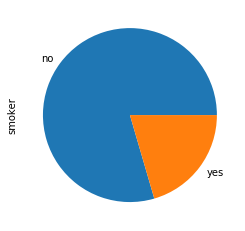

In [43]:
df.smoker.value_counts().plot(kind="pie")

<a id="grouping"></a>
### 6.3  *smoker* vs *expenses* statistics 

We use the `decribe()` method to analyze relation between the *smoker* and the *expenses* feature

In [44]:
df.groupby(['smoker']).expenses.describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268449,5993.781756,1121.87,3986.4425,7345.405,11362.890,36910.61
yes,274.0,32050.231971,11541.547338,12829.46,20826.2450,34456.350,41019.205,63770.43


### 6.4 *smoker* vs *age* statistics

We use the `mean()` method to analyze relation between the *smoker* and the *age* column

In [45]:
df.groupby("smoker").age.mean()

smoker
no     39.385338
yes    38.514599
Name: age, dtype: float64

### 6.5 Correlation between features

Pandas also offers a `corr()` method to define a correlation table between all features. A score of 1.0 means highest correlation and 0.0 means no correlation. 

In [46]:
df[['age', 'sex','bmi', 'children', 'smoker', 'region', 'expenses']].corr(method='pearson')

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000
